# 分類問題のデータ不均衡を解消するSMOTE（Python版） － その2：基本的なSMOTEを活用した3つのケーススタディ －

url: https://www.salesanalytics.co.jp/datascience/datascience211/

    データサイエンスの進化に伴い、多くの業界で複雑なデータ問題に直面しています。

    特に、データ不均衡は分析精度の低下を引き起こし、有意義な洞察の抽出を困難にしています。

    前回、データ不均衡問題を解消するための強力なテクニックであるSMOTE（Synthetic Minority Over-sampling Technique）とそのバリエーションについて紹介するとともに、Pythonのコード例を示しました

    url: https://www.salesanalytics.co.jp/datascience/datascience210/

    とは言え、最初に簡単にSMOTE（Synthetic Minority Over-sampling Technique）そのものに関し、お話しいたします。

    今回は、SMOTE（Synthetic Minority Over-sampling Technique）を使って、FinTechスタートアップからヘルスケア、オンライン小売まで、
    異なる業界でのデータ不均衡問題に対する、SMOTE事例をサンプルデータを交え説明します。

    実際の事例を通じて、SMOTEが如何にしてビジネスの課題を克服し、より精度の高い予測モデルの構築を可能にするかを示します。
    データ駆動型の意思決定を目指すすべてのプロフェッショナルに、新たな洞察と解決策を提供することを願っています。

## 前回の復習
### データ不均衡問題のビジネスへの影響
    データサイエンスの分野では、データ不均衡は避けられない問題です。この現象は、あるクラスの観測値が他のクラスに比べて著しく少ない場合に発生し、特に分類問題において顕著に表れます。
    たとえば、クレジットカード詐欺検出や疾患診断のようなシナリオでは、詐欺や疾患の事例（少数派クラス）は正常な事例（多数派クラス）に比べてはるかに少ない傾向があります。

    ビジネスにおけるこの問題の影響は重大です。データ不均衡が存在する場合、多数派クラスに偏った予測モデルが生成されるリスクがあり、これが重要な少数派クラスの見落としにつながる可能性があります。
    これは、誤ったビジネス決定、顧客満足度の低下、さらには財務上の損失に直結する問題です。



## SMOTEのデータサイエンスでの重要性
    このような状況に対処するための解決策として、SMOTE（Synthetic Minority Over-sampling Technique）が登場しました。
    SMOTEは、少数派クラスの合成サンプルを生成することによって、データセットのバランスを取る手法です。
    具体的には、既存の少数派クラスのサンプルからランダムに点を選び、それらの点の間で新しいサンプルを合成的に生成します。

    データサイエンスにおいてSMOTEの重要性は計り知れません。このテクニックにより、分析者は不均衡データの問題を緩和し、よりバランスの取れたモデルを構築できるようになります。
    その結果、より正確な予測、効果的な意思決定、そして最終的にはビジネスの成果向上に寄与することが可能になります。
    SMOTEは、データサイエンティストのツールボックスにおいて不可欠な技術の一つとして位置づけられています。

## FinTechスタートアップ：クレジットカード詐欺の検出
### 企業の背景と課題の説明

    あるオンライン金融サービスを提供しているFinTechスタートアップ企業です。顧客の取引データを分析してクレジットカード詐欺の行為を検出しようとしていました。

    詐欺ケース（少数派クラス）は正常な取引（多数派クラス）に比べて極端に少ないため、データ不均衡が大きな課題となっていました。

## 使用したデータセットの説明
    以下からダウンロードできます。

    sampledata1.csv

    このデータセットは、20個の特徴量（ feature_1 から feature_20 ）つまり説明変数と、詐欺（1）と正常（0）の2つのクラスからなる目的変数 fraudで構成されています。
    この分類問題は、20変数の特徴量で目的変数fraudの値を予測するものです。

    このデータセットの詐欺ケース（fraudの値が1）は全体の5%しかなく、データの不均衡が顕著です。

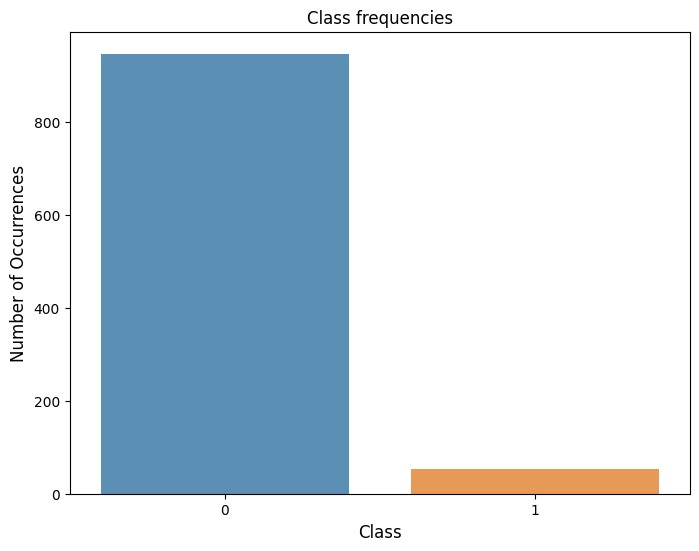

## SMOTEを使った適用例
    先ず、サンプルデータを読み込みます。

In [1]:
import pandas as pd
df = pd.read_csv('sampledata1.csv')
display(df)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,fraud
0,0.440820,0.103508,-1.340972,-1.613901,1.316099,0.258998,-1.682067,1.321211,-1.911642,-0.247351,...,-0.325513,-0.253640,1.492265,-3.013385,-1.148583,-0.648132,-0.722597,2.702713,-0.507693,0
1,-0.456496,0.784924,1.386960,-0.201039,0.854438,1.900320,1.035916,-1.450163,1.385575,1.612312,...,-0.358543,1.048794,-0.235871,-1.711506,0.309390,-1.795129,1.197489,2.567753,0.023946,0
2,-0.330811,0.609837,0.081144,-1.010591,-0.173815,1.478085,0.178715,-0.983103,0.333058,-0.643150,...,0.736227,0.736837,-0.254374,-1.878392,0.148057,0.880486,0.261519,2.460276,0.417459,0
3,-0.358244,0.401368,1.167121,0.957537,1.278575,0.977770,-0.023051,-0.673790,-1.097144,-0.476554,...,-1.076381,-0.149456,-2.712613,-2.881878,-1.430831,-0.552261,-0.298820,3.014801,0.416802,0
4,1.612780,1.029381,0.267136,-0.048776,-1.658775,2.490450,0.318837,1.559182,0.059963,-0.391300,...,-1.112186,-1.141986,-1.246393,-1.678770,0.348095,-0.699244,-0.096654,2.887655,-1.070158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.011901,-0.572393,-0.278120,0.512544,-0.482878,-1.369693,-1.903759,-0.567808,0.508012,-0.660841,...,1.222808,0.043901,0.290088,-4.087213,0.930533,-0.640147,-0.575186,2.652118,0.853015,0
996,-0.592703,1.565966,0.316068,0.770464,1.284105,3.784034,0.583883,0.428761,0.256997,-0.890436,...,-0.556718,0.955704,2.193450,-1.023895,-0.056789,0.655234,-0.564290,3.095412,-0.376423,0
997,0.563817,0.572017,-0.611768,-1.979320,-0.256595,1.387344,2.143445,0.287220,-0.865299,-1.019969,...,-1.363103,0.724428,0.693698,-2.068728,1.359291,0.442282,0.160562,2.567904,0.901112,0
998,0.191451,1.222892,-1.759959,-0.392726,-0.503722,2.957056,-0.445795,-1.192973,-1.498635,-0.770814,...,0.243891,-1.775982,-0.371462,-1.474319,-0.980947,0.662169,1.433625,2.989478,-1.012686,0


    では、SMOTEを使用してデータ不均衡を解消するコード例を示します。

    以下、コードです。

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# データの分割
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],
    df['fraud'],
    test_size=0.3,
    random_state=42)

# SMOTEの適用
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train,
    y_train)

# モデルのトレーニング
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# テストデータでの予測と評価
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       283
           1       1.00      0.82      0.90        17

    accuracy                           0.99       300
   macro avg       0.99      0.91      0.95       300
weighted avg       0.99      0.99      0.99       300



    このコードは、SMOTE (Synthetic Minority Over-sampling Technique) を使用してクレジットカード詐欺検出モデルを訓練し評価するためのものです。

    データの分割
    train_test_split関数を使用して、データフレーム(df)を特徴量(X)とターゲット変数(y)に分割し、それぞれを訓練データとテストデータに分けます。
    テストデータのサイズは全データの30%としています。random_stateパラメータを42に設定することで、再現可能な結果を得ることができます。

    SMOTEの適用
    SMOTE関数を使用して、トレーニングデータにオーバーサンプリングを適用します。
    これにより、マイノリティクラスの新しいサンプルが合成され、マイノリティクラスとマジョリティクラスとの間でバランスが取れます。

    モデルの訓練
    RandomForestClassifierを使用してSMOTEでバランスを取ったトレーニングデータを用いてモデルを訓練します。

    テストデータでの予測と評価
    訓練したモデルを使用してテストデータの予測を行い、その結果を classification_report を使用して評価します。
    評価指標には精度、再現率、F1スコアなどが含まれています。



    この出力は、ランダムフォレスト分類モデルの評価を表示したものです。指標には精度（Precision）、再現率（Recall）、F1スコア（F1-Score）、そしてこれらの平均値が含まれています。
    これらの指標はクラスごと（ここでは0と1）に計算されており、平均値はマクロ平均と加重平均で計算されています。さらに、全体的な精度（Accuracy）も計算されています。

    精度(Precision): モデルがあるクラスと予測したサンプルのうち、実際にそのクラスであったサンプルの割合

    再現率(Recall): 実際のあるクラスのサンプルのうち、モデルがそのクラスと正しく予測できたサンプルの割合

    F1スコア(F1-Score): 精度と再現率の調和平均を取った値。2つの指標のバランスをとって総合的なモデルの性能を判断する指標。

    これら3つの指標すべてが高いほど、モデルの予測性能は高いといえます。
    精度は正確性、再現率は捕捉力を示しており、F1スコアはその両方のバランスを考慮していることになります。

    この出力の一行目（「0」クラス（非詐欺））
    – 精度（Precision）：モデルが「0」のクラスと予測したアイテムのうち、実際に「0」のクラスであったアイテムの割合です。
    ここでは0.99となっていて、モデルが「0」と予測した時に、それが正しい可能性が高いことがわかります。

    – 再現率（Recall）：実際の「0」のクラスのアイテムのうち、モデルが「0」のクラスと正しく予測できたアイテムの割合です。
    ここでは1.00となっており、実際の「0」のクラスのアイテムを、モデルがどのくらい見つけられたかを示しています。

    – F1スコア（F1-Score）：F1スコアは精度と再現性の調和平均を示します。
    ここでは0.99となり、モデルが優れていることを示しています。

    この出力の二行目（「1」クラス（詐欺））
    – 精度（Precision）：モデルが「1」のクラスと予測したアイテムのうち、実際に「1」のクラスであったアイテムの割合です。
    ここでは1.00となっており、モデルが正しく詐欺を予測している比率が高いと言えます。

    – 再現率（Recall）：実際の「1」のクラスのアイテムのうち、モデルが「1」のクラスと正しく予測できたアイテムの割合です。
    ここでは0.82となっており、実際の「1」のクラスのアイテムを、モデルがどのくらい見つけられたかを示しています。
    一部の詐欺（18%）が見逃されていることを示しています。

    – F1スコア（F1-Score）：F1スコアは精度と再現性の調和平均を示します。
    ここでは0.90となり、モデルが詐欺を正しく予測する能力に優れています。

    この出力の三行目以降（全体的な評価）
    – 精度（Accuracy）：全てのアイテムの中で、モデルが正しく予測したアイテムの割合を示します。ここでは0.99となり、モデルの全体的な性能が高いことを表しています。

    – マクロ平均（Macro Avg）：全てのクラスの評価指標を平均したものです。全てのクラスを均等に扱うときの平均値で、精度、再現率、F1スコアがそれぞれ0.99、0.91、0.95となっています。

    – 加重平均（Weighted Avg）：各クラスの評価指標を、それぞれのクラスのサイプル数により重み付けして平均したものです。
    データによりサンプル数が多いクラスを重視する平均値で、精度、再現率、F1スコアがそれぞれ0.99、0.99、0.99となっています。

## 結果の分析と業務への影響
    SMOTEを適用することで、少数派クラス（詐欺ケース）のサンプル数が増加し、モデルは詐欺行為をより効果的に識別できるようになります。

    最終的なモデルの評価では、詐欺ケースに対するリコール（検出率）と精度が向上することが期待されます。

    このように、SMOTEを使用することで、データ不均衡の問題を緩和し、よりバランスの取れた予測モデルを構築することができます。

## ヘルスケアテック企業：病気の早期診断を助ける予測モデル
### 企業の背景と課題の説明
    あるヘルスケアテクノロジー企業です。病気の早期診断を助ける予測モデルの開発をしていました。

    がんのケース（少数派クラス）が正常な健康状態（多数派クラス）に比べて非常に少ないため、データの不均衡が診断モデルの精度に大きな影響を与えていました。

## 使用したデータセットの説明
    以下からダウンロードできます。

    sampledata2.csv

    このデータセットは、25個の特徴量（ feature_1 から feature_25 ）つまり説明変数と、疾患（1）と正常（0）の2つのクラスからなる目的変数 diseaseで構成されています。
    この分類問題は、25変数の特徴量で目的変数diseaseの値を予測するものです。

    このデータセットの詐欺ケース（diseaseの値が1）は全体の10%しかなく、データの不均衡が顕著です。

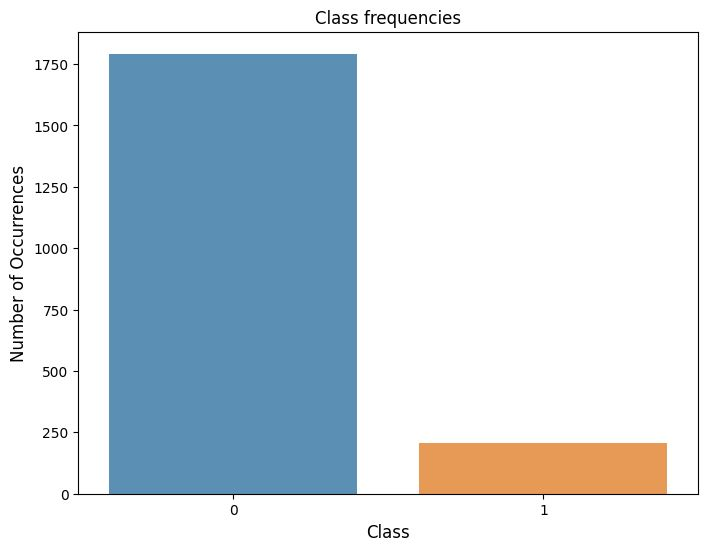

## SMOTEを使った適用例
    先ず、サンプルデータを読み込みます。

In [3]:
import pandas as pd
df = pd.read_csv('sampledata2.csv')
display(df)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,disease
0,-0.996889,1.583808,-0.300409,0.844863,-0.539400,0.517879,0.676154,1.206501,-0.266683,-1.693309,...,0.976670,-0.201333,1.229478,-0.027470,0.380022,-1.351794,0.200486,0.472607,0.357186,0
1,-2.365184,-0.644479,0.370575,0.415121,-1.661334,1.185117,-0.514516,0.278604,0.045967,0.346705,...,-0.347341,-0.420028,-1.839007,1.803838,-0.345140,0.977965,0.129938,1.575409,-1.265390,0
2,1.076196,1.665217,-1.060445,0.914628,0.757271,1.307254,0.105164,0.590005,-0.346297,0.595082,...,1.614977,-1.136430,-0.411977,0.196003,-0.386966,-0.646397,-1.169236,0.843073,0.921855,1
3,-1.043087,0.215330,1.065221,0.333844,-0.971502,-0.043687,2.451167,1.060818,1.420708,1.022805,...,-0.146785,0.448171,-1.127178,-2.624562,-1.305178,-0.241898,0.089413,0.019565,1.160713,0
4,-0.970125,-0.318907,1.227154,0.415502,-1.045979,0.397247,1.168880,1.004491,-1.214643,-0.203883,...,-0.447806,-0.341561,1.132880,0.952870,-0.507696,-0.811715,-0.656187,-0.287821,-2.322758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.850707,1.130963,1.104992,-1.511964,0.041243,-0.212897,-0.213899,0.897817,2.364525,0.789088,...,0.858068,1.286725,-1.017544,-1.130235,1.782632,1.894492,-0.638213,-0.704882,-0.510127,0
1996,-1.220538,-0.864695,0.200660,-1.051419,1.317100,-1.535801,-0.536962,1.637150,-0.271204,-1.601365,...,-0.190376,0.245724,2.028695,-1.512872,0.567788,1.359848,-0.262392,-0.511077,2.240391,0
1997,-0.530166,-0.703092,-0.208178,0.691124,-0.409468,-3.130914,-0.618593,-0.839148,-0.329228,-0.714848,...,0.585383,0.143319,-1.711693,1.228768,0.196348,-1.863535,0.490113,0.276265,-1.259404,0
1998,-1.836094,0.342047,-0.186910,0.454636,-0.700720,1.574557,1.343505,-0.076239,0.515974,-1.199211,...,-1.780913,0.523812,-1.363962,-0.565250,-1.662361,1.065877,-0.846464,1.252454,-1.952377,0


    では、SMOTEを使用してデータ不均衡を解消するコード例を示します。

    以下、コードです。

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# データの分割
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('disease', axis=1),
    df['disease'],
    test_size=0.3,
    random_state=123)

# SMOTEの適用
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train,
    y_train)

# ランダムフォレストモデルのトレーニング
model = RandomForestClassifier(random_state=123)
model.fit(X_train_smote, y_train_smote)

# テストデータでの予測と評価
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       537
           1       0.79      0.92      0.85        63

    accuracy                           0.97       600
   macro avg       0.89      0.95      0.92       600
weighted avg       0.97      0.97      0.97       600



    ここでの出力は、ランダムフォレスト分類器の性能を評価した結果です。

    この出力の一行目（「0」クラス（疾患なし））
    – 精度 (Precision): 0.99。つまり、モデルが「0」と予測したデータの99％が実際に「0」ということを示しています。
    つまり、モデルは疾患がないことを「正確」に予測できています。

    – 再現率 (Recall): 0.97。これは、実際の「0」クラスの全データ中、モデルが「0」クラスと正確に予測できたデータの割合を示しています。
    つまり、モデルは疾患がないケースを97%の確率で捕捉できます。

    – F1スコア (F1-score): 0.98。これは精度と再現率の調和平均で、モデルが「0」クラスをどれだけ良く予測できているかを示す指標です。
    ここでは0.98となっており、モデルは非常に優れたパフォーマンスを発揮していることを示しています。

    この出力の二行目（「1」クラス（疾患あり））
    – 精度 (Precision): 0.79。つまり、モデルが「1」と予測したデータの79％が実際に「1」ということを示しています。

    – 再現率 (Recall): 0.92。これは、実際の「1」クラスの全データ中、モデルが「1」クラスと正確に予測できたデータの割合を示しています。
    つまり、モデルは疾患が存在するケースの92%の確率で捕捉できます。

    – F1スコア (F1-score): 0.85。これは精度と再現率の調和平均です。「1」クラスについてのモデルの予測パフォーマンスは0.85となっており、
    モデルはこれらのケースを予測するのに良いパフォーマンスを発揮しています。

    この出力の三行目以降（全体的な評価）
    – 精度 (Accuracy): 0.97。これは全体的なモデルのパフォーマンスを示し、全ての予測に対する正解率を意味します。
    全データの97％を正確にクラス分けできました。

    – マクロ平均：これは、全てのクラスの精度、再現率、およびF1スコアの平均を示します。精度、再現率、F1スコアがそれぞれ0.89、0.95、0.92です。

    – 重み付き平均：これは各クラス内のサンプル数に基づいて、精度、再現率、F1スコアの平均を重み付けしたものです。
    精度、再現率、F1スコアがそれぞれ0.97、0.97、0.97です。

### オンライン小売業者：顧客チャーンの予測

## 企業の背景と課題の説明
    あるオンライン小売業者です。顧客の購買行動を分析し、将来的な購入可能性が低い顧客（チャーン）を予測するモデルの開発をしていました。

    チャーン（離反）する顧客（少数派クラス）が、チャーンしない顧客（多数派クラス）に比べて非常に少ないため、データの不均衡がモデルの精度に影響を及ぼしていました。


## 使用したデータセットの説明
    以下からダウンロードできます。

    sampledata3.csv

    このデータセットは、15個の特徴量（ feature_1 から feature_15 ）つまり説明変数と、チャーン（1）と非チャーン（0）の2つのクラスからなる目的変数 churnで構成されています。
    この分類問題は、15変数の特徴量で目的変数churnの値を予測するものです。

    このデータセットのチャーン（churnの値が1）は全体の16%しかなく、データの不均衡が顕著です。

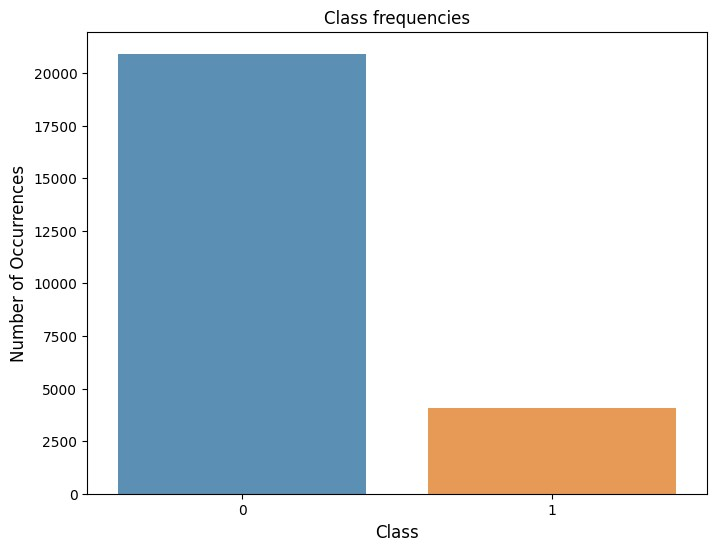

# SMOTEを使った適用例
    先ず、サンプルデータを読み込みます。

In [5]:
import pandas as pd
df = pd.read_csv('sampledata3.csv')
display(df)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,churn
0,1.011054,0.332941,0.717910,1.294935,-0.915445,0.034388,0.728261,1.290573,-0.365092,-1.325708,-0.556084,1.421946,-1.329326,0.516350,-0.340362,0
1,0.119608,-0.043261,-1.450449,1.662708,-0.568652,1.034703,1.285255,-2.334979,-1.454173,-0.389962,0.976677,-0.786233,-0.216387,0.897787,-1.156219,0
2,0.150131,0.148133,1.473714,1.277081,0.413806,-0.257786,-1.081341,0.012696,1.150065,0.081543,0.501094,0.082654,-0.294268,0.802521,-1.143565,0
3,-2.320033,-1.542275,-0.545293,-0.332298,-2.234485,1.075336,-0.158031,-0.737469,0.502508,0.846687,0.823329,-0.248439,0.311237,0.245996,0.477354,0
4,-1.204398,-0.648182,-0.033367,-0.138138,-0.310778,1.552792,0.554377,0.884807,-2.034477,0.869592,-1.718360,-0.399878,-1.463288,0.565565,-1.364542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.270520,-0.133738,0.183235,0.756777,-0.003799,1.189144,-2.689601,0.190800,-0.804638,0.228745,-0.171871,-0.308116,1.066832,0.232068,-1.576007,0
24996,1.698994,0.661077,1.730266,-0.243840,-0.972422,2.319434,0.756510,-1.243231,-0.704574,-1.941159,1.053330,-0.974819,-0.000853,-1.329572,0.184996,0
24997,2.686222,1.108262,-0.762803,-0.239401,-1.186240,-0.928729,0.159102,-0.067031,-0.696858,-2.891236,0.225795,-0.426881,-0.697952,-0.145999,3.408753,0
24998,1.085512,0.562521,-0.181021,-1.414647,0.159351,0.548200,1.121081,0.835696,-1.328351,-0.844904,1.186935,-1.115465,1.083643,-0.510750,-1.696239,0


    では、SMOTEを使用してデータ不均衡を解消するコード例を示します。

    以下、コードです。

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# データの分割
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('churn', axis=1),
    df['churn'],
    test_size=0.3,
    random_state=42)

# SMOTEの適用
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train,
    y_train)

# ランダムフォレストモデルのトレーニング
model = RandomForestClassifier(random_state=456)
model.fit(X_train_smote, y_train_smote)

# テストデータでの予測と評価
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6318
           1       0.72      0.87      0.79      1182

    accuracy                           0.92      7500
   macro avg       0.84      0.90      0.87      7500
weighted avg       0.93      0.92      0.93      7500



    この出力は、ランダムフォレスト分類モデルの評価を表示したものです。

    この出力の一行目（「0」クラス（非チャーン））

    – 精度（Precision）：モデルが「0」のクラスと予測したアイテムのうち、実際に「0」のクラスであったアイテムの割合です。
    ここでは0.97となっていて、モデルが予測に非常に優れていることを示しています。

    – 再現率（Recall）：実際の「0」のクラスのアイテムのうち、モデルが「0」のクラスと正しく予測できたアイテムの割合です。
    ここでは0.94となっており、モデルが非チャーンを見つける能力が高いことを示しています。

    – F1スコア（F1-Score）：F1スコアは精度と再現性の調和平均を示します。
    ここでは0.95となり、モデルが優れていることを示しています。

    この出力の二行目（「1」クラス（チャーン））
    – 精度（Precision）：「1」クラスと予測されたアイテムの中で実際に「1」クラスであったアイテムの割合を示します。
    ここでは0.72となっており、モデルが正しくチャーンを予測している比率が高いことを示しています。

    – 再現率（Recall）：モデルが「1」のクラスと予測したアイテムのうち、実際に「1」のクラスであったアイテムの割合です。
    ここでは0.87となっており、モデルがチャーンをそこそこ見つける能力があることを示しています。

    – F1スコア（F1-Score）：F1スコアは精度と再現性の調和平均を示します。ここでは0.79となり、モデルが優れていることを示しています。

    この出力の三行目以降（全体的な評価）
    – 精度（Accuracy）：全体のアイテムの中で正しく予測したアイテムの割合を示します。ここでは0.92となり、モデルの全体的な性能が高いことを表しています。

    – マクロ平均（Macro Avg）：全てのクラスの評価指標を平均したものです。
    全てのクラスを均等に扱うときの平均値で、精度、再現率、F1スコアがそれぞれ0.84、0.90、0.87となっています。

    – 加重平均（Weighted Avg）：各クラスの評価指標を、それぞれのクラスのサイプル数により重み付けして平均したものです。
    データによりサンプル数が多いクラスを重視する平均値で、精度、再現率、F1スコアがそれぞれ0.93、0.92、0.93となっています。



## SMOTEの適用における考慮点
    SMOTEはデータ不均衡問題を解決する強力なツールですが、適切に利用するためにはいくつかの重要なポイントを理解し実践する必要があります。

## SMOTEを使用する際のベストプラクティス
    その成功はデータの理解、適切な前処理、そして慎重なパラメータ調整に依存します。

    これらのベストプラクティスを実践することで、より精度の高い予測モデルの構築と効果的なビジネス戦略の実現が可能になります。

    以下の4点についてお話しします。

1. データの理解
2. 前処理の適用
3. パラメータの慎重な調整
4. バランスと質のトレードオフ

## 1. データの理解
    SMOTE（Synthetic Minority Over-sampling Technique）を適用する前のデータの理解は、その効果を最大化するために極めて重要です。

    以下に、データ理解の重要性と、特に焦点を当てるべきポイントについて詳しく説明します。

    a. データセットの全体像の理解
    ・データの構造: データセットに含まれる特徴量（変数）の数、タイプ（数値、カテゴリカル）、および各特徴量の分布を理解します。
    ・基本統計: 平均、中央値、標準偏差、四分位数などの基本統計を計算し、データの傾向と分布を掴みます。
    ・欠損値と異常値: 欠損値のパターンや異常値の存在を確認し、それらが分析にどのように影響するかを評価します。

    b. 少数派クラスと多数派クラスの特徴の理解
    ・クラス分布: ターゲット変数（ラベル）のクラス分布を確認し、少数派クラスと多数派クラスの割合を理解します。
    ・特徴の比較: 各特徴量が少数派クラスと多数派クラスでどのように異なるかを分析します。
    たとえば、特定の特徴量が少数派クラスで高い値をとることが多い、または特定のカテゴリが少数派クラスでより頻繁に出現するなどのパターンを識別します。
    ・相関関係の分析: 特徴量間の相関関係を分析し、クラスの分類に影響を与える可能性のある特徴量を特定します。
    
    c. SMOTEの適切な適用
    ・データの特性に基づくSMOTEの適用: データの理解に基づいて、SMOTEを適用する際に最適なパラメータ（近傍点の数、サンプリング戦略など）を選択します。
    ・合成サンプルの品質の確保: SMOTEは合成サンプルを生成しますが、これらが実際のデータの特性を適切に反映していることを確認する必要があります。
    合成サンプルが現実離れしている場合、モデルの過学習を招く可能性があります。
    
    データを徹底的に理解することは、SMOTEを効果的に適用し、バランスの取れたモデルを構築するための基礎です。

    特に、少数派クラスと多数派クラスの特徴を把握することは、データの不均衡に対処する上での重要なステップとなります。



## 2. 前処理の適用
    SMOTEを適用する前に、データセットに対して適切な前処理を行うことが極めて重要です。

    前処理は、データのクリーニング、欠損値の処理、変数のスケーリングなどを含み、SMOTEで生成される合成サンプルの品質に直接影響を与えます。以下に、主要な前処理手順を詳しく説明します。

    a. データクリーニング
    ・ノイズや外れ値の除去: データセットに含まれるノイズや外れ値を特定し、除去または修正します。
    これらの値が存在すると、SMOTEが不適切なサンプルを生成する原因となり得ます。
    ・重複データの削除: 同じデータポイントの重複がある場合、それを削除してデータセットの正確性を保ちます。
    
    b. 欠損値の処理
    ・欠損値の特定: データセット内の欠損値を特定し、それらがランダムかどうか、またその原因を理解します。
    ・欠損値の補完または削除: 欠損値を適切に補完（平均値、中央値、最頻値などで埋める）または削除します。
    適切に処理されない欠損値は、SMOTEの効果を低下させる可能性があります。
    
    c. 変数のスケーリング
    ・特徴量の正規化または標準化: すべての数値変数が同じスケールになるように正規化（例えば、0から1の範囲に変換）または標準化（平均0、標準偏差1に変換）を行います。
    ・これにより、SMOTEが特徴空間において均等にサンプルを生成するのを助けます。

    d. カテゴリカルデータの処理
    ・エンコーディング: カテゴリカルデータ（文字列やラベル）を数値形式に変換します（ワンホットエンコーディング、ラベルエンコーディングなど）。
    ・SMOTEは数値データに基づいて動作するため、このステップは必要です。

    適切な前処理は、SMOTEが元のデータの特性を反映した高品質な合成サンプルを生成するために不可欠です。

    データをきれいにし、欠損値を適切に処理し、すべての変数を適切にスケーリングすることで、バランスの取れたモデルの構築と、より信頼性の高い予測結果の実現が可能になります。

## 3. パラメータの慎重な調整
    SMOTE（Synthetic Minority Over-sampling Technique）を最大限に活用するためには、アルゴリズムのパラメータを慎重に調整することが重要です。

    主要なパラメータには、サンプリング戦略、近隣サンプル数（k値）、および合成サンプル生成の方法が含まれます。以下に、これらのパラメータの調整について詳しく説明します。

    a. サンプリング戦略
    ・サンプリング比率: 少数派クラスのサンプリング比率を決定します。
    ・これは、少数派クラスと多数派クラスの最終的なバランスに直接影響を与えます。比率を高く設定すると、
    より多くの合成サンプルが生成されますが、過度なサンプリングは過学習のリスクを高める可能性があります。
    
    b. 近隣サンプル数（k値）
    ・k値の選択: SMOTEでは、合成サンプルを生成する際に少数派クラスの各サンプルのk個の最近傍を使用します。
    k値が小さいと、近くのサンプルに基づいて細かい特徴が捉えられますが、大きすぎるとサンプルの多様性が失われる可能性があります。
    ・適切なk値の選定: データセットのサイズと複雑さに応じて、適切なk値を選定します。一般的には、5から10の範囲で調整されることが多いです。
    
    c. 合成サンプル生成方法
    ・サンプル生成アルゴリズム: 合成サンプルは、選択されたサンプルとその最近傍の間に線形に生成されますが、この生成方法を微調整するオプションもあります。
    ・例えば、特定の特徴量に重みを付けたり、サンプル生成のランダム性を調整したりすることが可能です。
    
    SMOTEの効果的な使用には、これらのパラメータをデータセットの特性と目的に合わせて慎重に調整することが不可欠です。

    サンプリング戦略、k値の設定、およびサンプル生成方法の適切な選択は、バランスの取れたデータセットを作成し、過学習を防ぎながら予測精度を高めるために重要です。
    パラメータの調整は、クロスバリデーションなどの方法を用いて評価し、最適化することが推奨されます。

## 4. バランスと質のトレードオフ
    不均衡なデータセットにおいてSMOTE（Synthetic Minority Over-sampling Technique）などのオーバーサンプリング手法を使用する際、クラスバランスの改善と合成サンプルの質の間には重要なトレードオフが存在します。

    このトレードオフを理解し適切に管理することは、効果的な機械学習モデルを構築する上で重要です。

    a. クラスバランスの改善
    ・少数派クラスのサンプル数を人工的に増やすことで、クラス間のバランスを改善します。
    これにより、分類モデルが少数派クラスをより適切に認識し、全体としての精度とリコールを向上させることが期待されます。
    ・バランスの取れたデータセットは、特に分類問題においてモデルの性能を向上させることが一般的に認識されています。
    
    b. 合成サンプルの質と実際のデータ分布
    ・SMOTEでは合成サンプルを生成しますが、これらのサンプルが実際のデータの特性を適切に反映しているかが重要です。
    不適切な合成サンプルは、実際のデータ分布を歪め、モデルが現実世界のデータに対してうまく一般化できない可能性があります。
    ・実際のデータ分布を尊重しながら、適切な数の合成サンプルを生成することが求められます。
    
    c. 過度なサンプリングと過学習のリスク
    ・オーバーサンプリングを過度に行うと、合成サンプルが過多になり、モデルがこれらの人工的な特徴に過剰適合（過学習）するリスクが高まります。
    ・過学習したモデルはトレーニングデータでは高い性能を示すものの、新しい未知のデータに対してはうまく機能しない可能性があります。

    SMOTEを適用する際は、クラスバランスの改善と合成サンプルの質の間のバランスを適切に取ることが重要です。

    サンプリング戦略を慎重に設計し、データの本質的な特性を保ちながら必要な数のサンプルを生成することが、過学習を防ぎ、より汎用性の高いモデルを構築する鍵となります。
    このトレードオフを理解し管理することで、データサイエンスプロジェクトの成功に大きく貢献することができます。

## 今回取り上げた業界の課題への対処方法
    SMOTEの適用は、データ駆動型の意思決定を支援する強力な手段です。しかし、その成功はデータの理解、適切な前処理、そして慎重なパラメータ調整に依存します。

    今お話ししたベストプラクティスを実践することで、より精度の高い予測モデルの構築と効果的なビジネス戦略の実現が可能になります。

    ここでは、今回ケーススタディとして取り上げた以下の業界の以下の予測モデルについて、お話しします。

1. FinTech業界における詐欺検出モデル
2. ヘルスケア業界における病気診断とSMOTEの使用
3. 小売業界における顧客のチャーン予測とSMOTEの使用

    FinTech業界における詐欺検出モデル
    FinTech業界における詐欺検出モデルは、金融取引における不正行為を特定することを目的としています。

    この分野における機械学習モデルの主要な課題は、偽陽性（誤検知）と偽陰性（見逃し）のバランスを適切に取ることです。
    SMOTE（Synthetic Minority Over-sampling Technique）の使用は、このバランスを取る上で重要な役割を果たします。

    誤検知（偽陽性）と見逃し（偽陰性）
    ・誤検知（偽陽性）: モデルが正常な取引を誤って詐欺と判断すること。
    これが多いと、顧客の不満や業務の遅延が発生する可能性があります。
    ・見逃し（偽陰性）: モデルが実際の詐欺取引を見逃すこと。
    これが多いと、金融機関は詐欺による損失を被るリスクが高まります。
    
    SMOTEの適用とバランスの取り方
    ・データ不均衡の解消: 詐欺取引は一般的に非常に稀なため、データセットにおいて少数派クラスになりがちです。
    SMOTEを使用してこの少数派クラスのサンプルを合成的に増やすことで、モデルが詐欺ケースをより効果的に学習し、偽陰性を減少させることが可能になります。
    ・精度とリコールのトレードオフ: 精度（Precision）は誤検知を低減することに焦点を当て、リコール（Recall）は見逃しを減らすことに重点を置きます。
    SMOTEを適用する際には、これらの指標の間のバランスを適切に取る必要があります。
    ・モデルの評価指標: AUC-ROC曲線、F1スコアなどの複合的な評価指標を使用して、誤検知と見逃しのバランスを評価します。
    
    FinTech業界における詐欺検出モデルでは、SMOTEの使用によりデータの不均衡を解消し、詐欺ケースの識別能力を高めることができます。

    ただし、誤検知と見逃しのバランスを考慮し、精度とリコールの最適なバランスを見つけることが重要です。
    これにより、効果的な詐欺検出システムを構築し、金融機関のリスク管理と顧客満足の両方を向上させることが可能になります。



## ヘルスケア業界における病気診断とSMOTEの使用
    ヘルスケア業界において、病気診断の精度は極めて重要です。

    特に、希少な疾患や早期段階の病気の検出は、治療の成功に直結し、患者の生存率を大きく改善する可能性があります。ここで、SMOTE（Synthetic Minority Over-sampling Technique）の使用が、モデルの感度を高めるための有効な手段となることがあります。

    少数派クラスの重要性
    ・病気診断のデータセットでは、疾患のケースが全体の中で少数派クラスになることが一般的です。これは、希少な病気や初期段階の疾患ケースが全体に占める割合が低いためです。
    ・この少数派クラスの検出は、早期治療の開始や疾患の進行防止に不可欠であり、モデルがこれらのケースを効果的に識別することが求められます。
    
    SMOTEの使用とモデルの感度向上
    ・SMOTEは少数派クラスのサンプル数を人工的に増加させることで、データセットのバランスを改善します。
    ・このバランスの改善により、機械学習モデルは少数派クラス（疾患ケース）の特徴をより効果的に学習し、病気の検出率（感度）を高めることができます。
    ・より多くの疾患ケースがモデルに含まれることで、早期または希少な疾患の識別能力が向上します。
    
    誤診のリスクとその管理
    ・一方で、SMOTEを使用する際には、誤診（偽陽性）のリスクも考慮する必要があります。
    合成サンプルが実際の病気の特徴を正確に反映していない場合、健康なケースを誤って病気と判断する可能性があります。
    ・誤診のリスクを管理するためには、SMOTEの適用に加えて、モデルの評価指標（精度、リコール、F1スコアなど）を慎重に選び、適切なバランスを見つける必要があります。
    ・臨床的な意思決定を支援するためには、モデルの感度と特異性（健康なケースを正しく識別する能力）の両方を最適化することが重要です。

    ヘルスケア業界において、SMOTEを使用することは、特に希少または早期の病気の検出において有効な手段となり得ます。

    しかし、この手法を用いる際には、誤診のリスクを適切に管理し、患者の診断と治療に最大限の利益をもたらすためのバランスを見つけることが重要です。
    適切に設計され管理されたモデルは、ヘルスケア分野での意思決定を大きく支援し、患者の予後を改善することに貢献することができます。



## 小売業界における顧客のチャーン予測とSMOTEの使用
    小売業界における顧客のチャーン（顧客離れ）予測は、ビジネスの持続可能性と成長のために重要です。

    この予測の目的は、どの顧客が将来的にサービスを止める可能性が高いかを特定し、そのような離れ行動を事前に防ぐことです。
    ここで、SMOTE（Synthetic Minority Over-sampling Technique）の適用が、チャーン予測モデルの性能向上に役立つことがあります。

    既存顧客の行動パターンの理解
    ・チャーン予測モデルの開発においては、顧客がサービスを続けるか、または離れるかのパターンを正確に把握することが不可欠です。
    ・顧客の購入履歴、利用頻度、デモグラフィック情報、サービス利用の変化などのデータを分析し、チャーンの可能性が高い行動特徴を特定する必要があります。
    
    SMOTEの適用と合成サンプルの生成
    ・チャーンする顧客は多くの場合、データセット内で少数派クラスを形成します。
    SMOTEを使用してこのクラスのサンプル数を増やすことで、モデルがチャーン関連のパターンをより詳細に学習することができます。
    ・重要なのは、SMOTEで生成される合成サンプルが、実際の顧客の行動特性を適切に反映することです。
    これにより、モデルは現実の顧客チャーンの傾向をより正確に捉えることが可能になります。

    チャーン予測モデルの性能向上
    ・SMOTEを用いることで、特に少数派クラスに対するモデルの感度（チャーンを正確に識別する能力）が向上することが期待されます。
    ・合成サンプルを通じてモデルに提供される情報が増えることで、顧客の離れ行動をより正確に予測し、タイムリーな顧客関係管理戦略の実施が可能になります。

    小売業界における顧客チャーン予測では、SMOTEを適用してデータの不均衡を解消し、顧客の行動特性を反映した合成サンプルを生成することが重要です。

    これにより、チャーン予測モデルの精度が向上し、ビジネスの収益性と顧客満足度の両方を高める戦略の策定に寄与します。
    ただし、合成サンプルの生成にあたっては、実際の顧客行動の特性を慎重に考慮し、適切なパラメータ設定が求められます。

## まとめ
    今回は、基本的なSMOTEを活用した3つのケーススタディ（FinTech、ヘルスケア、小売）を通し、SMOTE（Synthetic Minority Over-sampling Technique）がデータ不均衡問題に対処するための強力なツールであることを、お話ししました。

    ・少数派クラスの強化: SMOTEによる合成サンプルの生成は、少数派クラスのデータを増加させ、分類モデルの学習においてこれらのクラスにより大きな重みを与えます。
    ・モデル性能の向上: クラス間のバランスが改善されることで、モデルの全体的な性能、特に少数派クラスの識別能力が向上します。
    ・より公平な意思決定: データの不均衡が緩和されることにより、モデルはより公正かつバランスの取れた予測を行うことができるようになります。
    
    SMOTEはデータ不均衡という一般的な問題に対する効果的な解決策を提供します。

    その適切な適用により、より精度の高い予測モデルの構築が可能となり、データ駆動型の意思決定を支援します。

    今後のデータサイエンスの進展と共に、SMOTEの進化と新たな応用に注目が集まることでしょう。

    ただ、SMOTEで扱える特徴量は量的変数であるという制約があります。

    データサイエンスの分野は、新しい技術と手法の開発により常に進化しています。SMOTEは、これらの進化する技術の中で重要な役割を果たし続けるでしょう。

    SMOTEとそのバリエーションは、さらに洗練され、多様なデータセットや複雑な問題設定に適応するよう進化する可能性があります。

    次回は、SMOTEのバリエーション（質的変数を扱えるSMOTEなど）のケーススタディを取り上げます。